<a href="https://colab.research.google.com/github/vicperotti/ExtractTweetDetails/blob/master/InClassBeerScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from bs4 import BeautifulSoup
import urllib.request

In [6]:
soup = BeautifulSoup(urllib.request.urlopen('https://untappd.com/beer/top_rated').read(),'html.parser')

In [7]:
beers = soup.find_all("div",class_="beer-item")

In [8]:
import re
import pandas as pd

In [60]:
df = pd.DataFrame()

In [61]:
pattern = re.compile('.*desc-full.*')
for beer in beers:
  try:
    name = beer.find('p','name').get_text() # Look for a tag called p, that has class=name!!
    style = beer.find('p','style').get_text() # Look for a tag called p, that has class=style!!
    desc = beer.find('p',pattern).get_text() # Look for a tag called p, that has class= a regex pattern!!
    rating = beer.find('span','num').get_text() # Look for a tag called span, that has class=num pattern!!
    #print(desc)
    beerstats = [name,style,desc,rating]
    tempdf = pd.DataFrame(beerstats).transpose()
    df = pd.concat([df,tempdf],ignore_index=True)
  except:
    pass

  #so we now need to click more pages
  #try:
  #      driver.find_element_by_xpath('//a[@class="nav next taLnk ui_button primary"]').click()
  #except:
  #      print('an exception occurred')
  #finally:
  #      time.sleep(5)


In [62]:
df.columns = ["name","style","review","rating"]
df.rating = df.rating.str.strip('()')
df.rating = df.rating.astype(float)
df

,name,style,review,rating
0,Beer : Barrel : Time (2019),Side Project Brewing,The barrel stock we tasted through to choose t...,4.74
1,Beer : Barrel : Time (2018),Side Project Brewing,"For Beer : Barrel : Time 2018, we chose a blen...",4.74
2,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Co.,This beer is the real McCoy. Barrel aged and c...,4.74
3,King JJJuliusss,Tree House Brewing Company,To continue with our 4th Anniversary celebrati...,4.74
4,Bourbon County Brand Stout Vanilla Rye (2014),Goose Island Beer Co.,First brewed for the legendary festival of Woo...,4.74
5,Proprietor's Bourbon County Brand Stout (2014),Goose Island Beer Co.,Proprietor’s Bourbon County Brand Stout is mea...,4.74
6,Rare Bourbon County Brand Stout (2010),Goose Island Beer Co.,Aged 2 years in 23-year old Pappy Van Winkle B...,4.74
7,Blue Suede Shews,Pips Meadery,14% Orange Blossom Honey-wine with Wild Bluebe...,4.72
8,Blessed,Anchorage Brewing Company,Blessed is a blend of 1 and 3 year old bourbon...,4.71
9,Rare Bourbon County Brand Stout (2015),Goose Island Beer Co.,Back in 1979 the folks at Heaven Hill Distille...,4.71


In [74]:
#Grab some validation data - how about Irish?
#https://untappd.com/beer/top_rated?country=ireland
#https://untappd.com/beer/top_rated?type=malt-liquor&country=united-states
maltdf = pd.DataFrame()
maltsoup = BeautifulSoup(urllib.request.urlopen('https://untappd.com/beer/top_rated?country=ireland').read(),'html.parser')
maltbeers = maltsoup.find_all("div",class_="beer-item")
pattern = re.compile('.*desc-full.*')
for beer in maltbeers:
  try:
    name = beer.find('p','name').get_text() # Look for a tag called p, that has class=name!!
    style = beer.find('p','style').get_text() # Look for a tag called p, that has class=style!!
    desc = beer.find('p',pattern).get_text() # Look for a tag called p, that has class= a regex pattern!!
    rating = beer.find('span','num').get_text() # Look for a tag called span, that has class=num pattern!!
    #print(desc)
    beerstats = [name,style,desc,rating]
    tempdf = pd.DataFrame(beerstats).transpose()
    maltdf = pd.concat([maltdf,tempdf],ignore_index=True)
  except:
    pass

maltdf.columns =  ["name","style","review","rating"]
maltdf.rating = maltdf.rating.str.strip('()')
maltdf.rating = maltdf.rating.astype(float)

In [75]:
maltdf

,name,style,review,rating
0,Two Hundred Fathoms,Galway Bay Brewery,Imperial Stout.\n2014 version aged in Yellow S...,4.23
1,Do You Wanna Touch Me,Whiplash,"Collaboration with Wylam.\nDIPA w/ Citra, Vic ...",4.16
2,Surrender to the Void,Whiplash,"DIPA w/ Citra, Mosaic & Columbus Read Less",4.15
3,Boulevardier,Galway Bay Brewery,"Brewed in 2018. A barleywine-styled beast, age...",4.10
4,Let It Happen,Whiplash,CITRA. CITRA. CITRA.\nLet It Happen takes our ...,4.10
5,Setting Sun,Whiplash,"DIPA w/ Citra, BRU-1 , El Dorado Read Less",4.09
6,The 1798,Guinness,Read Less,4.08
7,Headlines,Whiplash,Our first Triple IPA has arrived and it’s an a...,4.08
8,Black Boar - Barrel Aged Batch II 2016,The White Hag Irish Brewing Company,A fierce and powerful creature was the Black B...,4.06
9,Festa Nuda,The White Hag Irish Brewing Company,This big Irish Coffee Pastry Stout is a collab...,4.05


In [85]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result
  
#all_x = pd.concat([df.review,maltdf.review]) #pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(df.review, 'all')

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
train_vecs_dbow = get_vectors(model_ug_dbow, df.review, 100) #x_train
validation_vecs_dbow = get_vectors(model_ug_dbow, maltdf.review, 100) #x_validation

clf = LinearRegression()
clf.fit(train_vecs_dbow, df.rating) #x_train,y_train
#clf.mean_squared_error(validation_vecs_dbow, maltdf.rating) # x_validation,y_validation)

100%|██████████| 50/50 [00:00<00:00, 101067.57it/s]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', clf.coef_)
# rsquared for training data

pred = clf.predict(validation_vecs_dbow)
print('Mean squared error: %.2f'
      % mean_squared_error(maltdf.rating, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
% r2_score(maltdf.rating, pred))
r2_score(maltdf.rating, pred)

Coefficients: 
 [-1.64320106e-01 -4.62469108e-01  1.78005700e-02  5.42534825e-01
  9.62258799e-02 -2.44233705e-01  1.24967887e+00 -3.15717014e-01
 -2.47682650e-01 -7.79538703e-01  6.52130126e-02 -4.35736725e-01
 -7.94181498e-02 -6.43338256e-01 -3.20481122e-01 -2.50641245e-01
  5.70953025e-01 -9.26763417e-02 -1.26294186e+00  3.99268524e-01
 -5.10155388e-02 -2.31899597e-01 -2.96803729e-01 -4.43695689e-01
  2.57298690e-01  4.66708195e-02 -2.01243458e-01  6.43368036e-01
  1.04668187e-01 -7.18556868e-01 -5.85550428e-01  5.77890151e-01
 -6.39740862e-01  7.67330114e-02  7.77298764e-02  1.21925347e-01
 -1.46291818e-01 -1.15648142e-01 -3.88663107e-01 -1.64537957e-01
 -1.21809591e-01  1.53343917e-02 -5.40983983e-01  5.39742995e-01
 -2.18914986e-02  2.62629878e-01 -2.94074942e-01  4.57728439e-01
  3.22229256e-01  6.22375613e-01 -1.43837234e-01  1.50871216e-01
  2.38633743e-01  1.09521526e-01  7.30878083e-01 -3.54527217e-02
  5.15537767e-01 -4.94358029e-01 -2.04968952e-01 -5.60653151e-02
 -2.13002

-97.4897268801138

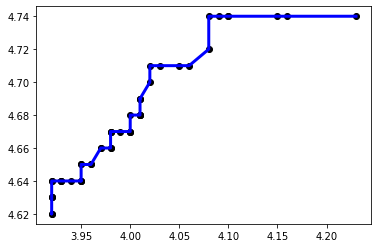

In [84]:
import matplotlib.pyplot as plt

plt.scatter(maltdf.rating, pred,  color='black')
plt.plot(maltdf.rating, pred, color='blue', linewidth=3)